In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [ ]:
#np.isnan(X)
#np.nan_to_num(X)

#psd_corn.replace([np.inf, -np.inf], np.nan, inplace=True)
#psd_corn.fillna(999, inplace=True)

In [7]:
psd_filtered = pd.read_csv('psd_final.csv')

In [8]:
psd_filtered

,Unnamed: 0,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
0,30,Corn,Afghanistan,AF,1990,1991,0,480,0,0,0,480,480,480,0.000000
1,31,Corn,Afghanistan,AF,1991,1992,0,420,0,0,0,420,420,420,0.000000
2,32,Corn,Afghanistan,AF,1992,1993,0,300,0,0,0,300,300,300,0.000000
3,33,Corn,Afghanistan,AF,1993,1994,0,470,0,0,0,470,470,470,0.000000
4,34,Corn,Afghanistan,AF,1994,1995,0,500,0,0,0,500,500,500,0.000000
5,35,Corn,Afghanistan,AF,1995,1996,0,530,0,0,0,530,530,530,0.000000
6,36,Corn,Afghanistan,AF,1996,1997,0,360,0,0,0,360,360,360,0.000000
7,37,Corn,Afghanistan,AF,1997,1998,0,300,0,0,0,300,300,300,0.000000
8,38,Corn,Afghanistan,AF,1998,1999,0,330,0,0,0,330,330,330,0.000000
9,39,Corn,Afghanistan,AF,1999,2000,0,240,0,0,0,240,240,240,0.000000


In [9]:
psd_filtered = psd_filtered.drop(['Unnamed: 0'],axis=1)


In [10]:
psd_filtered

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
0,Corn,Afghanistan,AF,1990,1991,0,480,0,0,0,480,480,480,0.000000
1,Corn,Afghanistan,AF,1991,1992,0,420,0,0,0,420,420,420,0.000000
2,Corn,Afghanistan,AF,1992,1993,0,300,0,0,0,300,300,300,0.000000
3,Corn,Afghanistan,AF,1993,1994,0,470,0,0,0,470,470,470,0.000000
4,Corn,Afghanistan,AF,1994,1995,0,500,0,0,0,500,500,500,0.000000
5,Corn,Afghanistan,AF,1995,1996,0,530,0,0,0,530,530,530,0.000000
6,Corn,Afghanistan,AF,1996,1997,0,360,0,0,0,360,360,360,0.000000
7,Corn,Afghanistan,AF,1997,1998,0,300,0,0,0,300,300,300,0.000000
8,Corn,Afghanistan,AF,1998,1999,0,330,0,0,0,330,330,330,0.000000
9,Corn,Afghanistan,AF,1999,2000,0,240,0,0,0,240,240,240,0.000000


[(0, 50)]

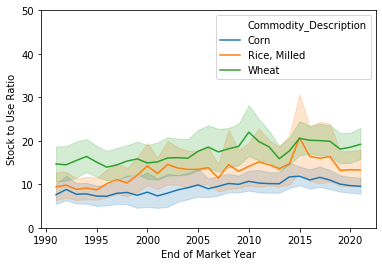

In [11]:
sns.lineplot(x='End of Market Year',y='Stock to Use Ratio',hue='Commodity_Description',data=psd_filtered).set(ylim=(0, 50))


In [41]:
psd_filtered.isna().sum()

Commodity_Description     0
Country_Name              0
Country_Code              0
Market_Year               0
End of Market Year        0
Beginning Stocks          0
Domestic Consumption      0
Ending Stocks             0
Exports                   0
Imports                   0
Production                0
Total Distribution        0
Total Supply              0
Stock to Use Ratio       78
dtype: int64

In [12]:
psd_filtered[(psd_filtered['Commodity_Description'] =='Rice, Milled') & (psd_filtered['Market_Year'] >= 2013)]
##SURs have NaNs

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
3809,"Rice, Milled",Afghanistan,AF,2013,2014,0,473,0,0,140,333,473,473,0.000000
3810,"Rice, Milled",Afghanistan,AF,2014,2015,0,469,0,0,120,349,469,469,0.000000
3811,"Rice, Milled",Afghanistan,AF,2015,2016,0,566,0,0,300,266,566,566,0.000000
3812,"Rice, Milled",Afghanistan,AF,2016,2017,0,658,0,0,426,232,658,658,0.000000
3813,"Rice, Milled",Afghanistan,AF,2017,2018,0,500,0,0,280,220,500,500,0.000000
3814,"Rice, Milled",Afghanistan,AF,2018,2019,0,487,0,0,258,229,487,487,0.000000
3815,"Rice, Milled",Afghanistan,AF,2019,2020,0,607,0,0,230,377,607,607,0.000000
3816,"Rice, Milled",Afghanistan,AF,2020,2021,0,613,0,0,270,343,613,613,0.000000
3840,"Rice, Milled",Algeria,AG,2013,2014,0,121,0,0,121,0,121,121,0.000000
3841,"Rice, Milled",Algeria,AG,2014,2015,0,129,0,0,129,0,129,129,0.000000


In [13]:
#a few contries have NaNs in the stock to use ratio, can fill them with 0 since production,consumption and ending stocks are 0
#psd.replace([np.inf, -np.inf], np.nan, inplace=True)
psd_filtered.fillna(0, inplace=True)

In [14]:
#check
psd_filtered.isna().sum()

Commodity_Description    0
Country_Name             0
Country_Code             0
Market_Year              0
End of Market Year       0
Beginning Stocks         0
Domestic Consumption     0
Ending Stocks            0
Exports                  0
Imports                  0
Production               0
Total Distribution       0
Total Supply             0
Stock to Use Ratio       0
dtype: int64

[(0, 50)]

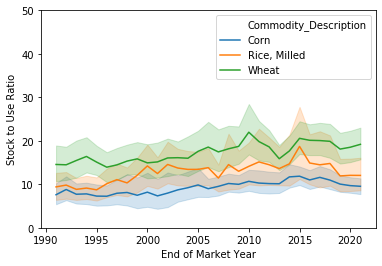

In [12]:
sns.lineplot(x='End of Market Year',y='Stock to Use Ratio',hue='Commodity_Description',data=psd_filtered).set(ylim=(0, 50))

### Feature Selection 
#### Finding the correlation

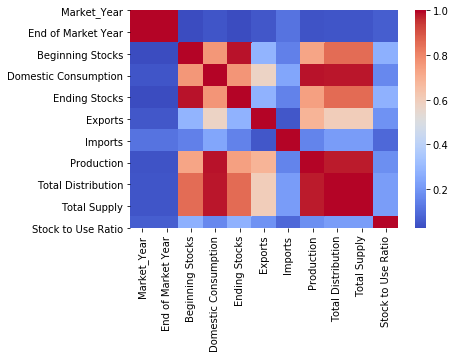

In [12]:
sns.heatmap(psd_filtered.corr(),cmap='coolwarm')

In [15]:
psd_corn = psd_filtered[(psd_filtered['Commodity_Description'] =='Corn')]
psd_corn

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
0,Corn,Afghanistan,AF,1990,1991,0,480,0,0,0,480,480,480,0.000000
1,Corn,Afghanistan,AF,1991,1992,0,420,0,0,0,420,420,420,0.000000
2,Corn,Afghanistan,AF,1992,1993,0,300,0,0,0,300,300,300,0.000000
3,Corn,Afghanistan,AF,1993,1994,0,470,0,0,0,470,470,470,0.000000
4,Corn,Afghanistan,AF,1994,1995,0,500,0,0,0,500,500,500,0.000000
5,Corn,Afghanistan,AF,1995,1996,0,530,0,0,0,530,530,530,0.000000
6,Corn,Afghanistan,AF,1996,1997,0,360,0,0,0,360,360,360,0.000000
7,Corn,Afghanistan,AF,1997,1998,0,300,0,0,0,300,300,300,0.000000
8,Corn,Afghanistan,AF,1998,1999,0,330,0,0,0,330,330,330,0.000000
9,Corn,Afghanistan,AF,1999,2000,0,240,0,0,0,240,240,240,0.000000


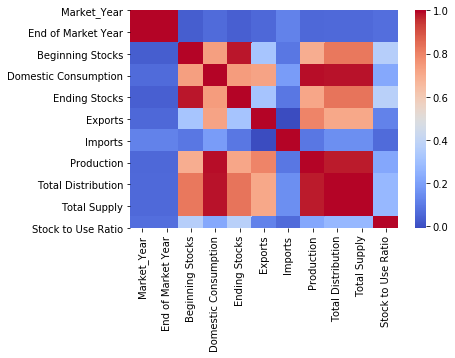

In [14]:
sns.heatmap(psd_corn.corr(),cmap='coolwarm')

In [16]:
psd_wheat = psd_filtered[(psd_filtered['Commodity_Description'] =='Wheat')]
psd_wheat

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
7403,Wheat,Afghanistan,AF,1990,1991,0,1655,0,0,5,1650,1655,1655,0.000000
7404,Wheat,Afghanistan,AF,1991,1992,0,1741,0,0,15,1726,1741,1741,0.000000
7405,Wheat,Afghanistan,AF,1992,1993,0,1668,0,0,18,1650,1668,1668,0.000000
7406,Wheat,Afghanistan,AF,1993,1994,0,2033,0,0,93,1940,2033,2033,0.000000
7407,Wheat,Afghanistan,AF,1994,1995,0,2082,0,0,32,2050,2082,2082,0.000000
7408,Wheat,Afghanistan,AF,1995,1996,0,2125,0,0,125,2000,2125,2125,0.000000
7409,Wheat,Afghanistan,AF,1996,1997,0,2376,0,0,76,2300,2376,2376,0.000000
7410,Wheat,Afghanistan,AF,1997,1998,0,2801,0,0,90,2711,2801,2801,0.000000
7411,Wheat,Afghanistan,AF,1998,1999,0,2876,0,0,42,2834,2876,2876,0.000000
7412,Wheat,Afghanistan,AF,1999,2000,0,2849,0,0,350,2499,2849,2849,0.000000


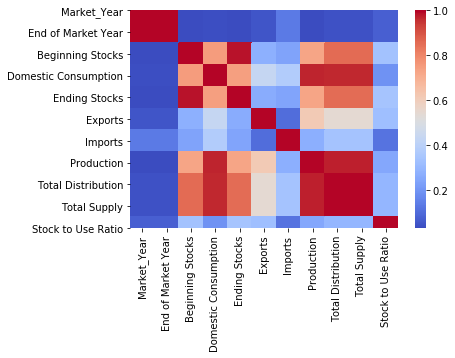

In [16]:
sns.heatmap(psd_wheat.corr(),cmap='coolwarm')

In [17]:
psd_Afg = psd_filtered[(psd_filtered['Country_Name'] =='Afghanistan')]
                       # & (psd_filtered['End of Market Year']>=2000)]
psd_Afg

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
0,Corn,Afghanistan,AF,1990,1991,0,480,0,0,0,480,480,480,0.000000
1,Corn,Afghanistan,AF,1991,1992,0,420,0,0,0,420,420,420,0.000000
2,Corn,Afghanistan,AF,1992,1993,0,300,0,0,0,300,300,300,0.000000
3,Corn,Afghanistan,AF,1993,1994,0,470,0,0,0,470,470,470,0.000000
4,Corn,Afghanistan,AF,1994,1995,0,500,0,0,0,500,500,500,0.000000
5,Corn,Afghanistan,AF,1995,1996,0,530,0,0,0,530,530,530,0.000000
6,Corn,Afghanistan,AF,1996,1997,0,360,0,0,0,360,360,360,0.000000
7,Corn,Afghanistan,AF,1997,1998,0,300,0,0,0,300,300,300,0.000000
8,Corn,Afghanistan,AF,1998,1999,0,330,0,0,0,330,330,330,0.000000
9,Corn,Afghanistan,AF,1999,2000,0,240,0,0,0,240,240,240,0.000000


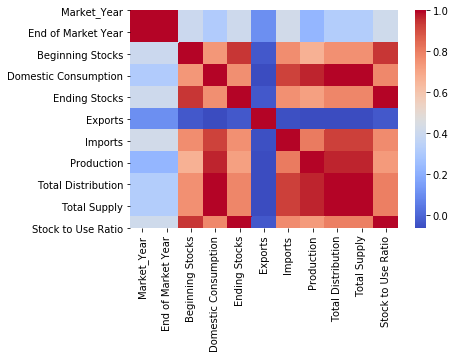

In [18]:
sns.heatmap(psd_Afg.corr(),cmap='coolwarm')

In [18]:
psd_Ind = psd_filtered[(psd_filtered['Country_Name'] =='India')]
psd_Ind

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
1581,Corn,India,IN,1990,1991,500,9261,200,1,0,8962,9462,9462,2.159594
1582,Corn,India,IN,1991,1992,200,8156,100,4,0,8060,8260,8260,1.226091
1583,Corn,India,IN,1992,1993,100,9965,100,28,1,9992,10093,10093,1.003512
1584,Corn,India,IN,1993,1994,100,9564,100,36,0,9600,9700,9700,1.045588
1585,Corn,India,IN,1994,1995,100,8868,100,17,1,8884,8985,8985,1.127650
1586,Corn,India,IN,1995,1996,100,9488,100,42,0,9530,9630,9630,1.053963
1587,Corn,India,IN,1996,1997,100,10500,362,8,0,10770,10870,10870,3.447619
1588,Corn,India,IN,1997,1998,362,10900,275,7,1,10819,11182,11182,2.522936
1589,Corn,India,IN,1998,1999,275,11300,296,2,175,11148,11598,11598,2.619469
1590,Corn,India,IN,1999,2000,296,11350,689,17,250,11510,12056,12056,6.070485


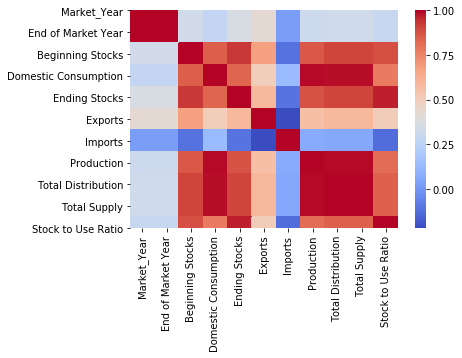

In [20]:
sns.heatmap(psd_Ind.corr(),cmap='coolwarm')

In [19]:
psd_Usa = psd_filtered[(psd_filtered['Country_Name'] =='United States')]
psd_Usa

,Commodity_Description,Country_Name,Country_Code,Market_Year,End of Market Year,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Production,Total Distribution,Total Supply,Stock to Use Ratio
3538,Corn,United States,US,1990,1991,34151,153273,38641,43858,87,201534,235772,235772,25.210572
3539,Corn,United States,US,1991,1992,38641,160826,27949,40233,499,189868,229008,229008,17.378409
3540,Corn,United States,US,1992,1993,27949,172927,53672,42249,180,240719,268848,268848,31.037374
3541,Corn,United States,US,1993,1994,53672,159851,21595,33741,529,160986,215187,215187,13.509456
3542,Corn,United States,US,1994,1995,21595,182251,39571,55311,243,255295,277133,277133,21.712364
3543,Corn,United States,US,1995,1996,39571,160552,10819,56589,419,187970,227960,227960,6.738627
3544,Corn,United States,US,1996,1997,10819,177586,22433,45655,337,234518,245674,245674,12.632189
3545,Corn,United States,US,1997,1998,22433,185087,33220,38214,224,233864,256521,256521,17.948316
3546,Corn,United States,US,1998,1999,33220,185788,45391,50401,478,247882,281580,281580,24.431610
3547,Corn,United States,US,1999,2000,45391,192496,43628,49191,375,239549,285315,285315,22.664367


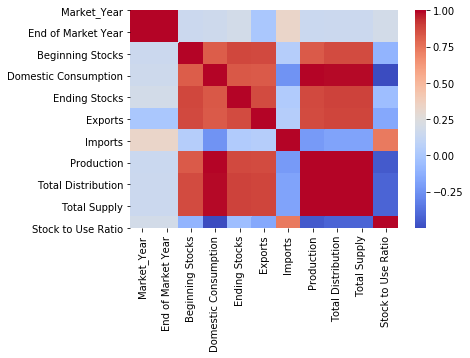

In [22]:
sns.heatmap(psd_Usa.corr(),cmap='coolwarm')

#### When the data is analyzed countrywise,there is a strong correlation between SUR and a couple of other features 

In [38]:
#features = psd_corn.iloc[:,7:14].columns.tolist()
#target = psd_corn.iloc[:,6].name
#target

In [107]:
#correlations = {}
#for f in features:
#    psd_temp = psd_corn[[f,target]]
#   x1 = psd_temp[f].values
#    x2 = psd_temp[target].values
#    key = f + ' vs ' + target
#    correlations[key] = pearsonr(x1,x2)[0]

In [39]:
#data_correlations = pd.DataFrame(correlations, index=['Value']).T
#data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

In [42]:
#features

In [41]:
#features1 = psd_corn.iloc[:,3:10].columns.tolist()
#target1 = psd_corn.iloc[:,10].name
#features1

In [117]:
#correlations = {}
#for f in features1:
#    psd_temp = psd_corn[[f,target1]]
#    x1 = psd_temp[f].values
#    x2 = psd_temp[target1].values
#    key = f + ' vs ' + target1
#    correlations[key] = pearsonr(x1,x2)[0]

In [40]:
#data_correlations = pd.DataFrame(correlations, index=['Value']).T
#data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

#### Multivariate Linear reg

In [23]:
def model1(X,y):
    regr = linear_model.LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
                                                   
    linreg = regr.fit(X_train, y_train)

    print('linear model intercept: {}'.format(linreg.intercept_))
    print('linear model coeff:\n{}'.format(linreg.coef_))
    print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
    

In [29]:
#SUR worldwide
X = psd_filtered[['End of Market Year','Beginning Stocks','Ending Stocks','Domestic Consumption','Production']]
y = psd_filtered['Stock to Use Ratio']
model1(X,y)

linear model intercept: -273.600814128435
linear model coeff:
[ 0.14286917  0.00068568  0.00025054 -0.00111784  0.00087047]
R-squared score (training): 0.097
R-squared score (test): 0.128


In [30]:
X = psd_corn[['End of Market Year','Ending Stocks','Domestic Consumption','Production','Total Supply']] 
y = psd_corn['Stock to Use Ratio']
#'End of Market Year','Ending Stocks','Domestic Consumption','Production','Total Supply'
model1(X,y)

linear model intercept: -191.39213383059533
linear model coeff:
[ 9.97448859e-02 -1.19698818e-05 -6.67175523e-04 -3.28828403e-04
  8.14279283e-04]
R-squared score (training): 0.167
R-squared score (test): 0.134


In [28]:
# Total Production
X = psd_filtered[['Domestic Consumption','Total Distribution','Total Supply']]  
y = psd_filtered['Production']
model1(X,y)

linear model intercept: -442.22851377018014
linear model coeff:
[ 8.13856847e-01  4.50347237e+11 -4.50347237e+11]
R-squared score (training): 0.975
R-squared score (test): 0.966


In [38]:
 #plt.figure(figsize=(5,4))
#  plt.scatter(X[xaxis], y, marker= 'o', s=50, alpha=0.8)
#    plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
#    plt.title('Least-squares linear regression')
#    plt.xlabel('Feature value (x)')
#    plt.ylabel('Target value (y)')
#    plt.show()


#### Polynomial Reg

In [20]:
def polyreg(X,y):
    from sklearn.preprocessing import MinMaxScaler

    poly = PolynomialFeatures(degree=2)
    X_1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_1_poly, y,
                                                   random_state = 0)
    
    ## Using feature normalization
    
    scaler = MinMaxScaler() 
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    linreg2 = LinearRegression().fit(X_train_scaled, y_train)

    print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg2.coef_))
    print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))
    print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg2.score(X_train_scaled, y_train)))
    print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg2.score(X_test_scaled, y_test)))
    
    
    

In [77]:
#SUR worldwide
X = psd_filtered[['End of Market Year','Beginning Stocks','Ending Stocks','Domestic Consumption','Production']]
y = psd_filtered['Stock to Use Ratio']
polyreg(X,y)

(poly deg 2) linear model coeff (w):
[     0.           1372.99577776  13936.89029258 -18819.81297198
 -16847.14212477  19654.55522299  -1369.37210056 -14187.70456293
  19651.99184988  16533.14945497 -19466.90745737    772.89388239
  -1043.69884176  -1821.19754187   1591.87647891    267.15719336
    514.47212981  -1039.14300169   5082.73502581  -9953.74447202
   4996.94057237]
(poly deg 2) linear model intercept (b): 9.069
(poly deg 2) R-squared score (training): 0.150
(poly deg 2) R-squared score (test): 0.158



In [78]:
# Commodity wise
X = psd_corn[['End of Market Year','Ending Stocks','Domestic Consumption','Production','Total Supply']] 
y = psd_corn['Stock to Use Ratio']
#'End of Market Year','Ending Stocks','Domestic Consumption','Production','Total Supply'
polyreg(X,y)

(poly deg 2) linear model coeff (w):
[     0.            115.6412292  -71629.99809842 -12252.32488002
    942.08057013  28230.99273884   -112.64653834  72609.74325292
  11685.93511891  -1366.40563835 -27282.47736601  -4899.22893648
  -6545.09054178  -6799.59737867  21728.30942095  -2889.70716239
  -6026.8357333   15020.42895107  -7030.16355706  23867.26518003
 -25240.73256004]
(poly deg 2) linear model intercept (b): 6.620
(poly deg 2) R-squared score (training): 0.240
(poly deg 2) R-squared score (test): 0.213



In [79]:
# SUR countrywise
X = psd_Afg[['Beginning Stocks','Ending Stocks']] 
y = psd_Afg['Stock to Use Ratio']
polyreg(X,y)

(poly deg 2) linear model coeff (w):
[ 0.         -0.0288611   8.37865734 -1.11404788  1.65401867 -2.72736123]
(poly deg 2) linear model intercept (b): 0.003
(poly deg 2) R-squared score (training): 0.999
(poly deg 2) R-squared score (test): 0.981



In [58]:
X = psd_Usa[['Imports','Domestic Consumption']] 
y = psd_Usa['Stock to Use Ratio']
polyreg(X,y)

(poly deg 2) linear model coeff (w):
[  0.         116.58117036   0.67182763 -45.60254371 -41.46809997
  -1.39171511]
(poly deg 2) linear model intercept (b): 18.419
(poly deg 2) R-squared score (training): 0.738
(poly deg 2) R-squared score (test): 0.410



In [21]:
X = psd_Ind[['Ending Stocks','Domestic Consumption']] 
y = psd_Ind['Stock to Use Ratio']
polyreg(X,y)

(poly deg 2) linear model coeff (w):
[ 0.00000000e+00  8.24550171e+01 -3.44774544e+00  1.81004228e+00
 -5.01138378e+01  1.91895525e-03]
(poly deg 2) linear model intercept (b): 2.957
(poly deg 2) R-squared score (training): 0.990
(poly deg 2) R-squared score (test): 0.994

